In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, f1_score, precision_recall_curve
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Read the required files

In [2]:
data = arff.loadarff('../data/bankrupt/5year.arff')
data = pd.DataFrame(data[0])

In [3]:
data.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


In [4]:
data.shape

(5910, 65)

## Rename columns

In [6]:
new_cols = {
"Attr1": "profit_by_total assets",
"Attr2": "liabilities_by_total assets",
"Attr3": "wc_ta",
"Attr4": "curAsst_shtTermLiabilities",
"Attr5": "NetEquity_by_expenses * 365",
"Attr6": "retainedEarnings_ta",
"Attr7": "EBIT_ta",
"Attr8" :"bvEquity_tl",
"Attr9" :"sales_ta",
"Attr10": "eq/ta",
"Attr11" :"gpExtraOrdItemsExpenses_ta",
"Attr12": "gp_shrtTermLiabilities",
"Attr13" :"gpDepr_sales",
"Attr14": "gpInt_totalassets",
"Attr15":" liabilities365_gpDepr)",
"Attr16" :"gpDepr_liabilities",
"Attr17": "ta_liabilities",
"Attr18": "gp_ta",
"Attr19": "gp_sales",
"Attr20": "inventory365_sales",
"Attr21": "sales(n)_sales(n-1)",
"Attr22": "opProfit+ta",
"Attr23": "profit_sales",
"Attr24": "gp3_ta",
"Attr25": "(equity - share capital) / total assets",
"Attr26": "(net profit + depreciation) / total liabilities",
"Attr27": "profit on operating activities / financial expenses",
"Attr28": "working capital / fixed assets",
"Attr29": "logarithm of total assets",
"Attr30": "(total liabilities - cash) / sales",
"Attr31": "(gross profit + interest) / sales",
"Attr32": "(current liabilities * 365) / cost of products sold",
"Attr33": "operating expenses / short-term liabilities",
"Attr34": "operating expenses / total liabilities",
"Attr35" :"profit on sales / total assets",
"Attr36": "total sales / total assets",
"Attr37": "(current assets - inventories) / long-term liabilities",
"Attr38": "constant capital / total assets",
"Attr39": "profit on sales / sales",
"Attr40": "(current assets - inventory - receivables) / short-term liabilities",
"Attr41": "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
"Attr42": "profit on operating activities / sales",
"Attr43": "rotation receivables + inventory turnover in days",
"Attr44": "(receivables * 365) / sales",
"Attr45": 'net profit / inventory',
"Attr46": "(current assets - inventory) / short-term liabilities",
"Attr47": "(inventory * 365) / cost of products sold",
"Attr48": "EBITDA (profit on operating activities - depreciation) / total assets",
"Attr49": "EBITDA (profit on operating activities - depreciation) / sales",
"Attr50": "current assets / total liabilities",
"Attr51": "short-term liabilities / total assets",
"Attr52": "(short-term liabilities * 365) / cost of products sold)",
"Attr53": "equity / fixed assets",
"Attr54": "constant capital / fixed assets",
"Attr55": "working capital",
"Attr56": "(sales - cost of products sold) / sales",
"Attr57": "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
"Attr58": "total costs /total sales",
"Attr59" :"long-term liabilities / equity",
"Attr60": "sales / inventory",
"Attr61": "sales / receivables",
"Attr62": "(short-term liabilities *365) / sales",
"Attr63": "sales / short-term liabilities",
"Attr64": "sales / fixed assets"
}

In [7]:
data = data.rename(columns=new_cols)
data.head(5)

,profit_by_total assets,liabilities_by_total assets,wc_ta,curAsst_shtTermLiabilities,NetEquity_by_expenses * 365,retainedEarnings_ta,EBIT_ta,bvEquity_tl,sales_ta,eq/ta,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


# Explore the data

## Understanding target distribution
- convert the type
- get count of each class
- plot the count

In [8]:
data['class'].head()

0    b'0'
1    b'0'
2    b'0'
3    b'0'
4    b'0'
Name: class, dtype: object

In [9]:
data['class'] = data['class'].astype(int)

In [10]:
data['class'].value_counts()

0    5500
1     410
Name: class, dtype: int64

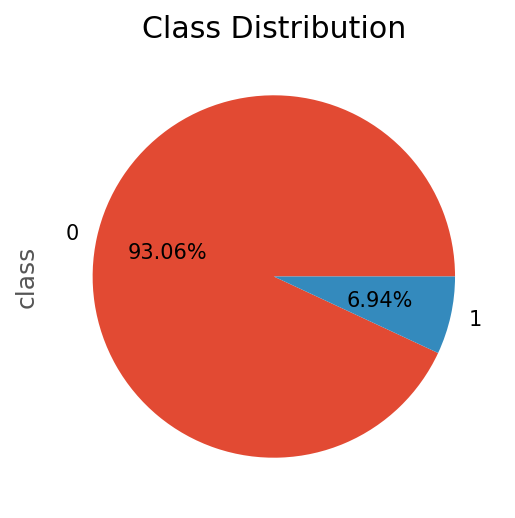

In [11]:
data['class'].value_counts().plot.pie(autopct = "%.2f%%",title = "Class Distribution")
plt.show()

# Plot histograms of all features

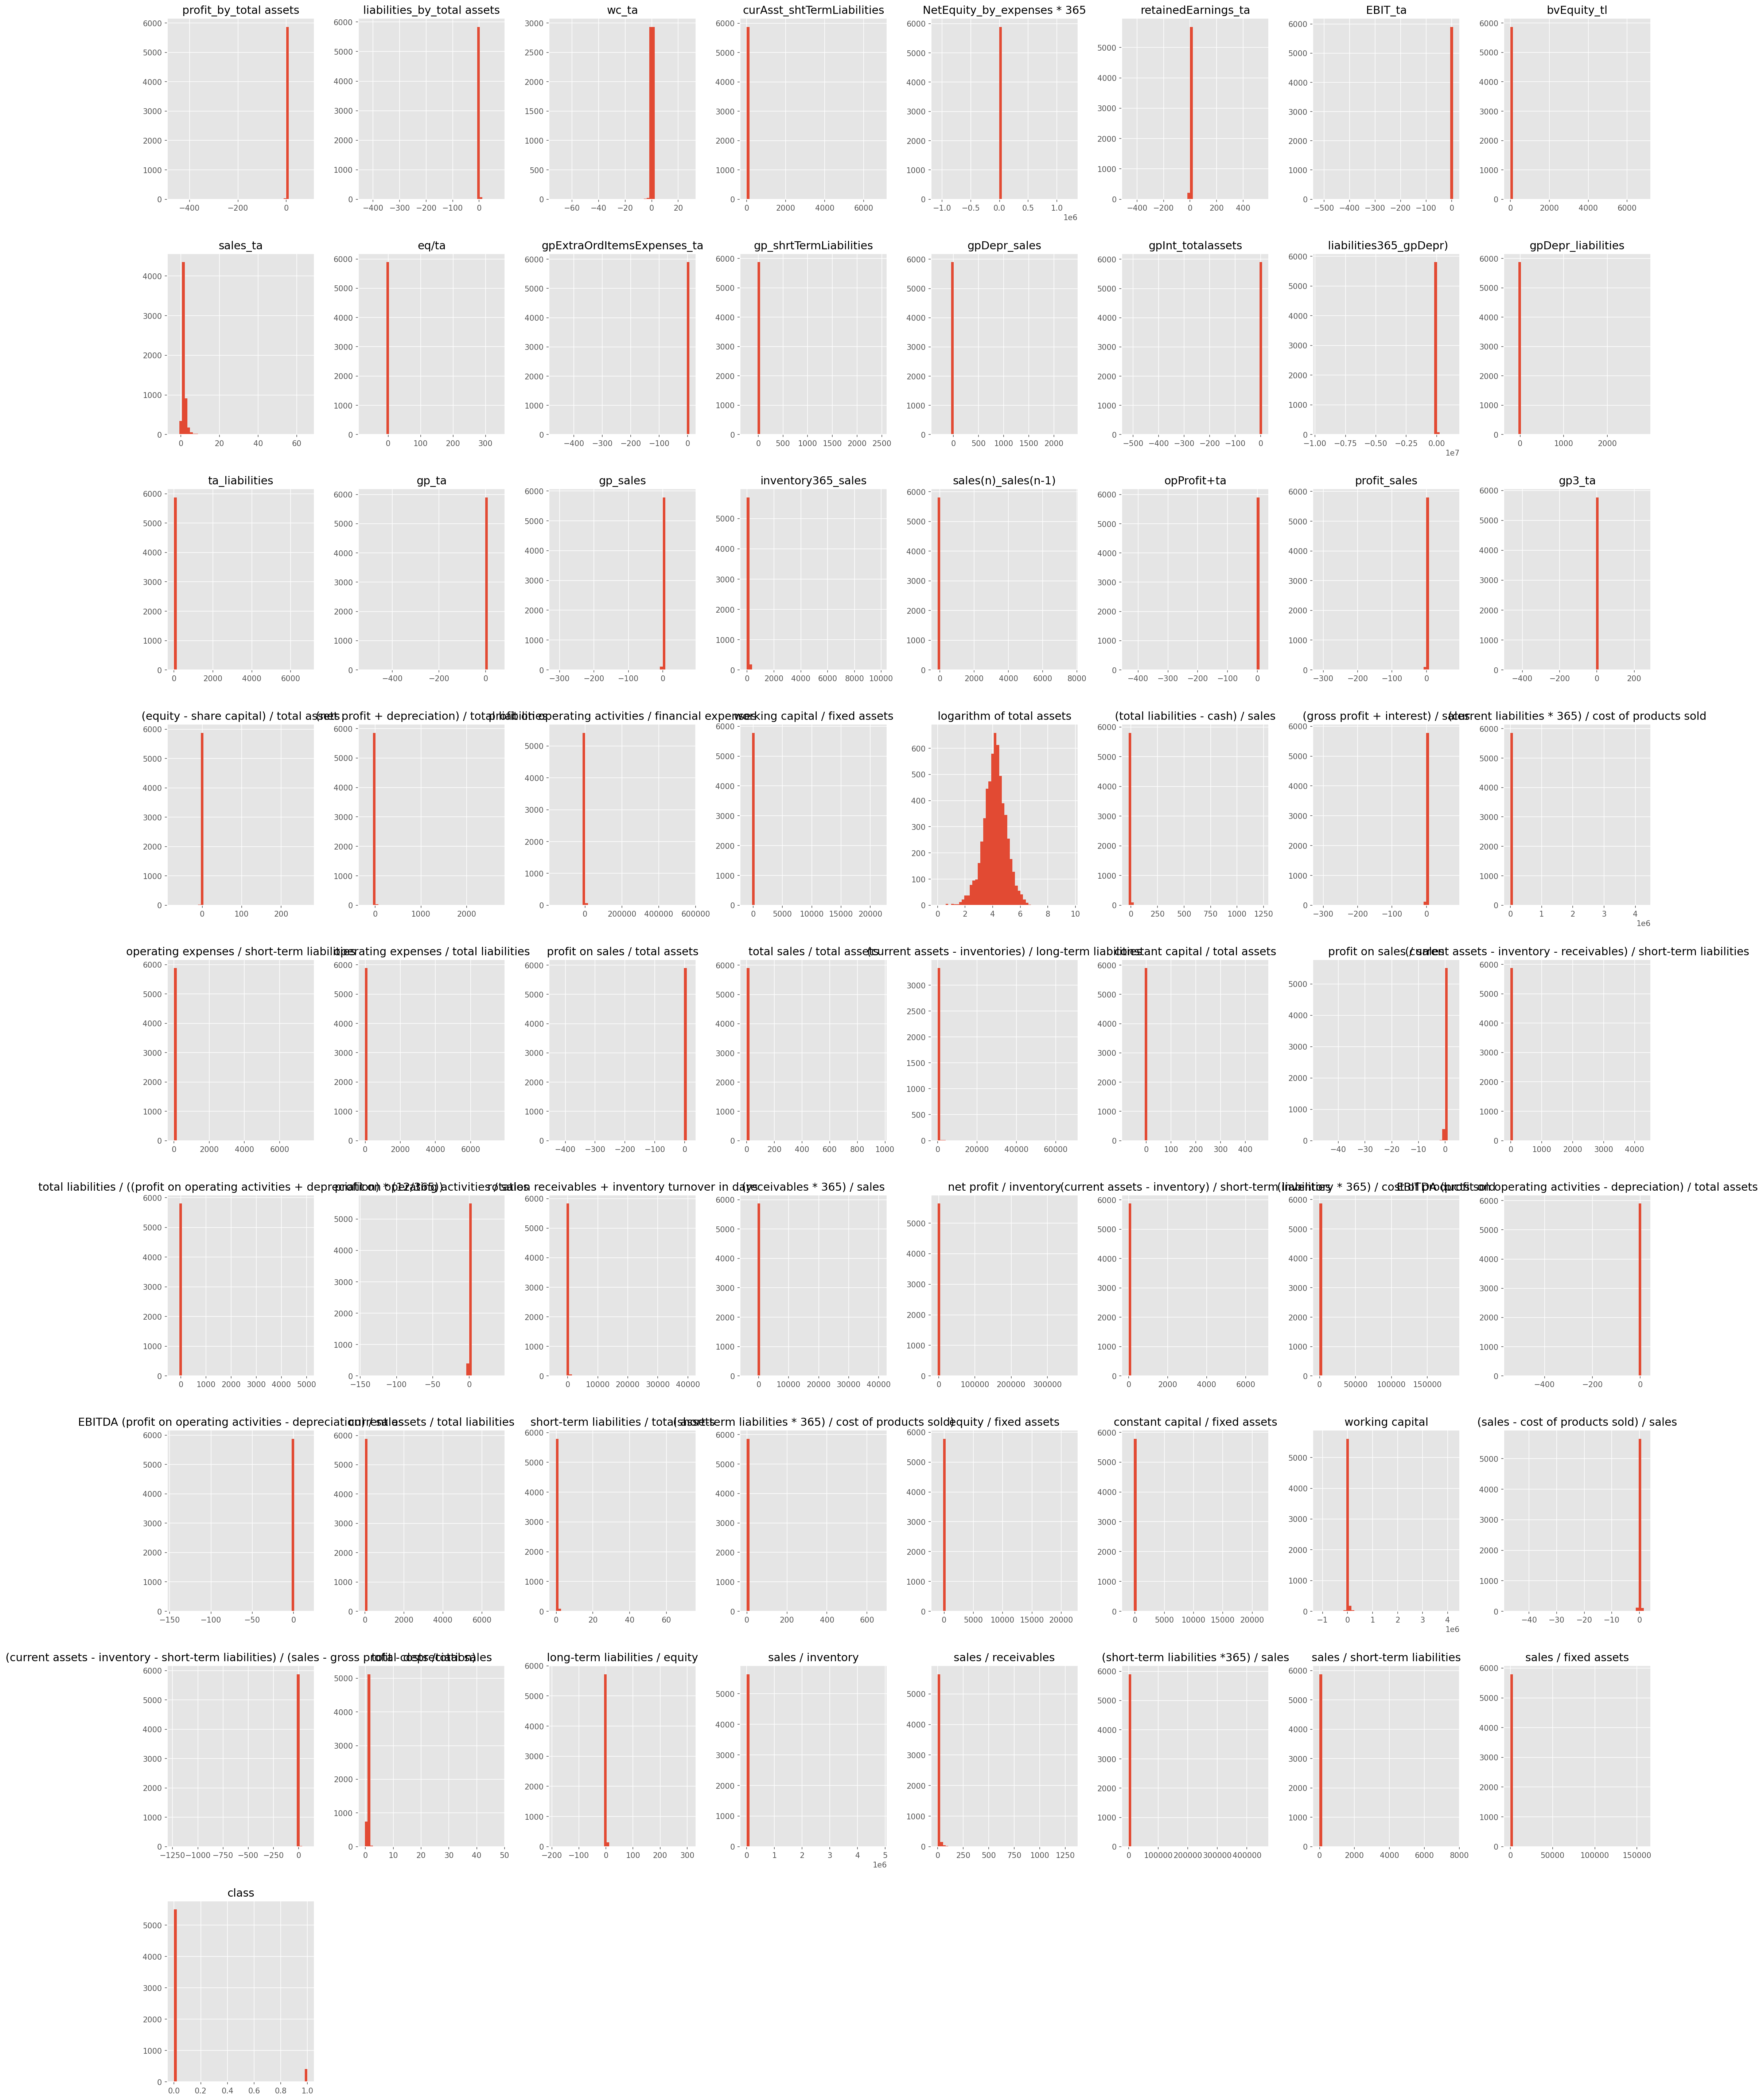

In [12]:
data.hist(figsize=(35, 50), bins=50)
plt.show()

## Get X and Y from data

In [13]:
x = data.drop('class', axis=1)
y = data['class'].copy()

### Function

#### apply log transform if variable is skew

In [14]:
def apply_log_tranformation(data):
  for col in data:
    skew = data[col].skew()

    if skew > 1 or skew < -1:
      data[col] = np.log1p(data[col])
  return data

In [15]:
x = apply_log_tranformation(x)

In [16]:
x = x.replace([np.inf, -np.inf], np.nan)

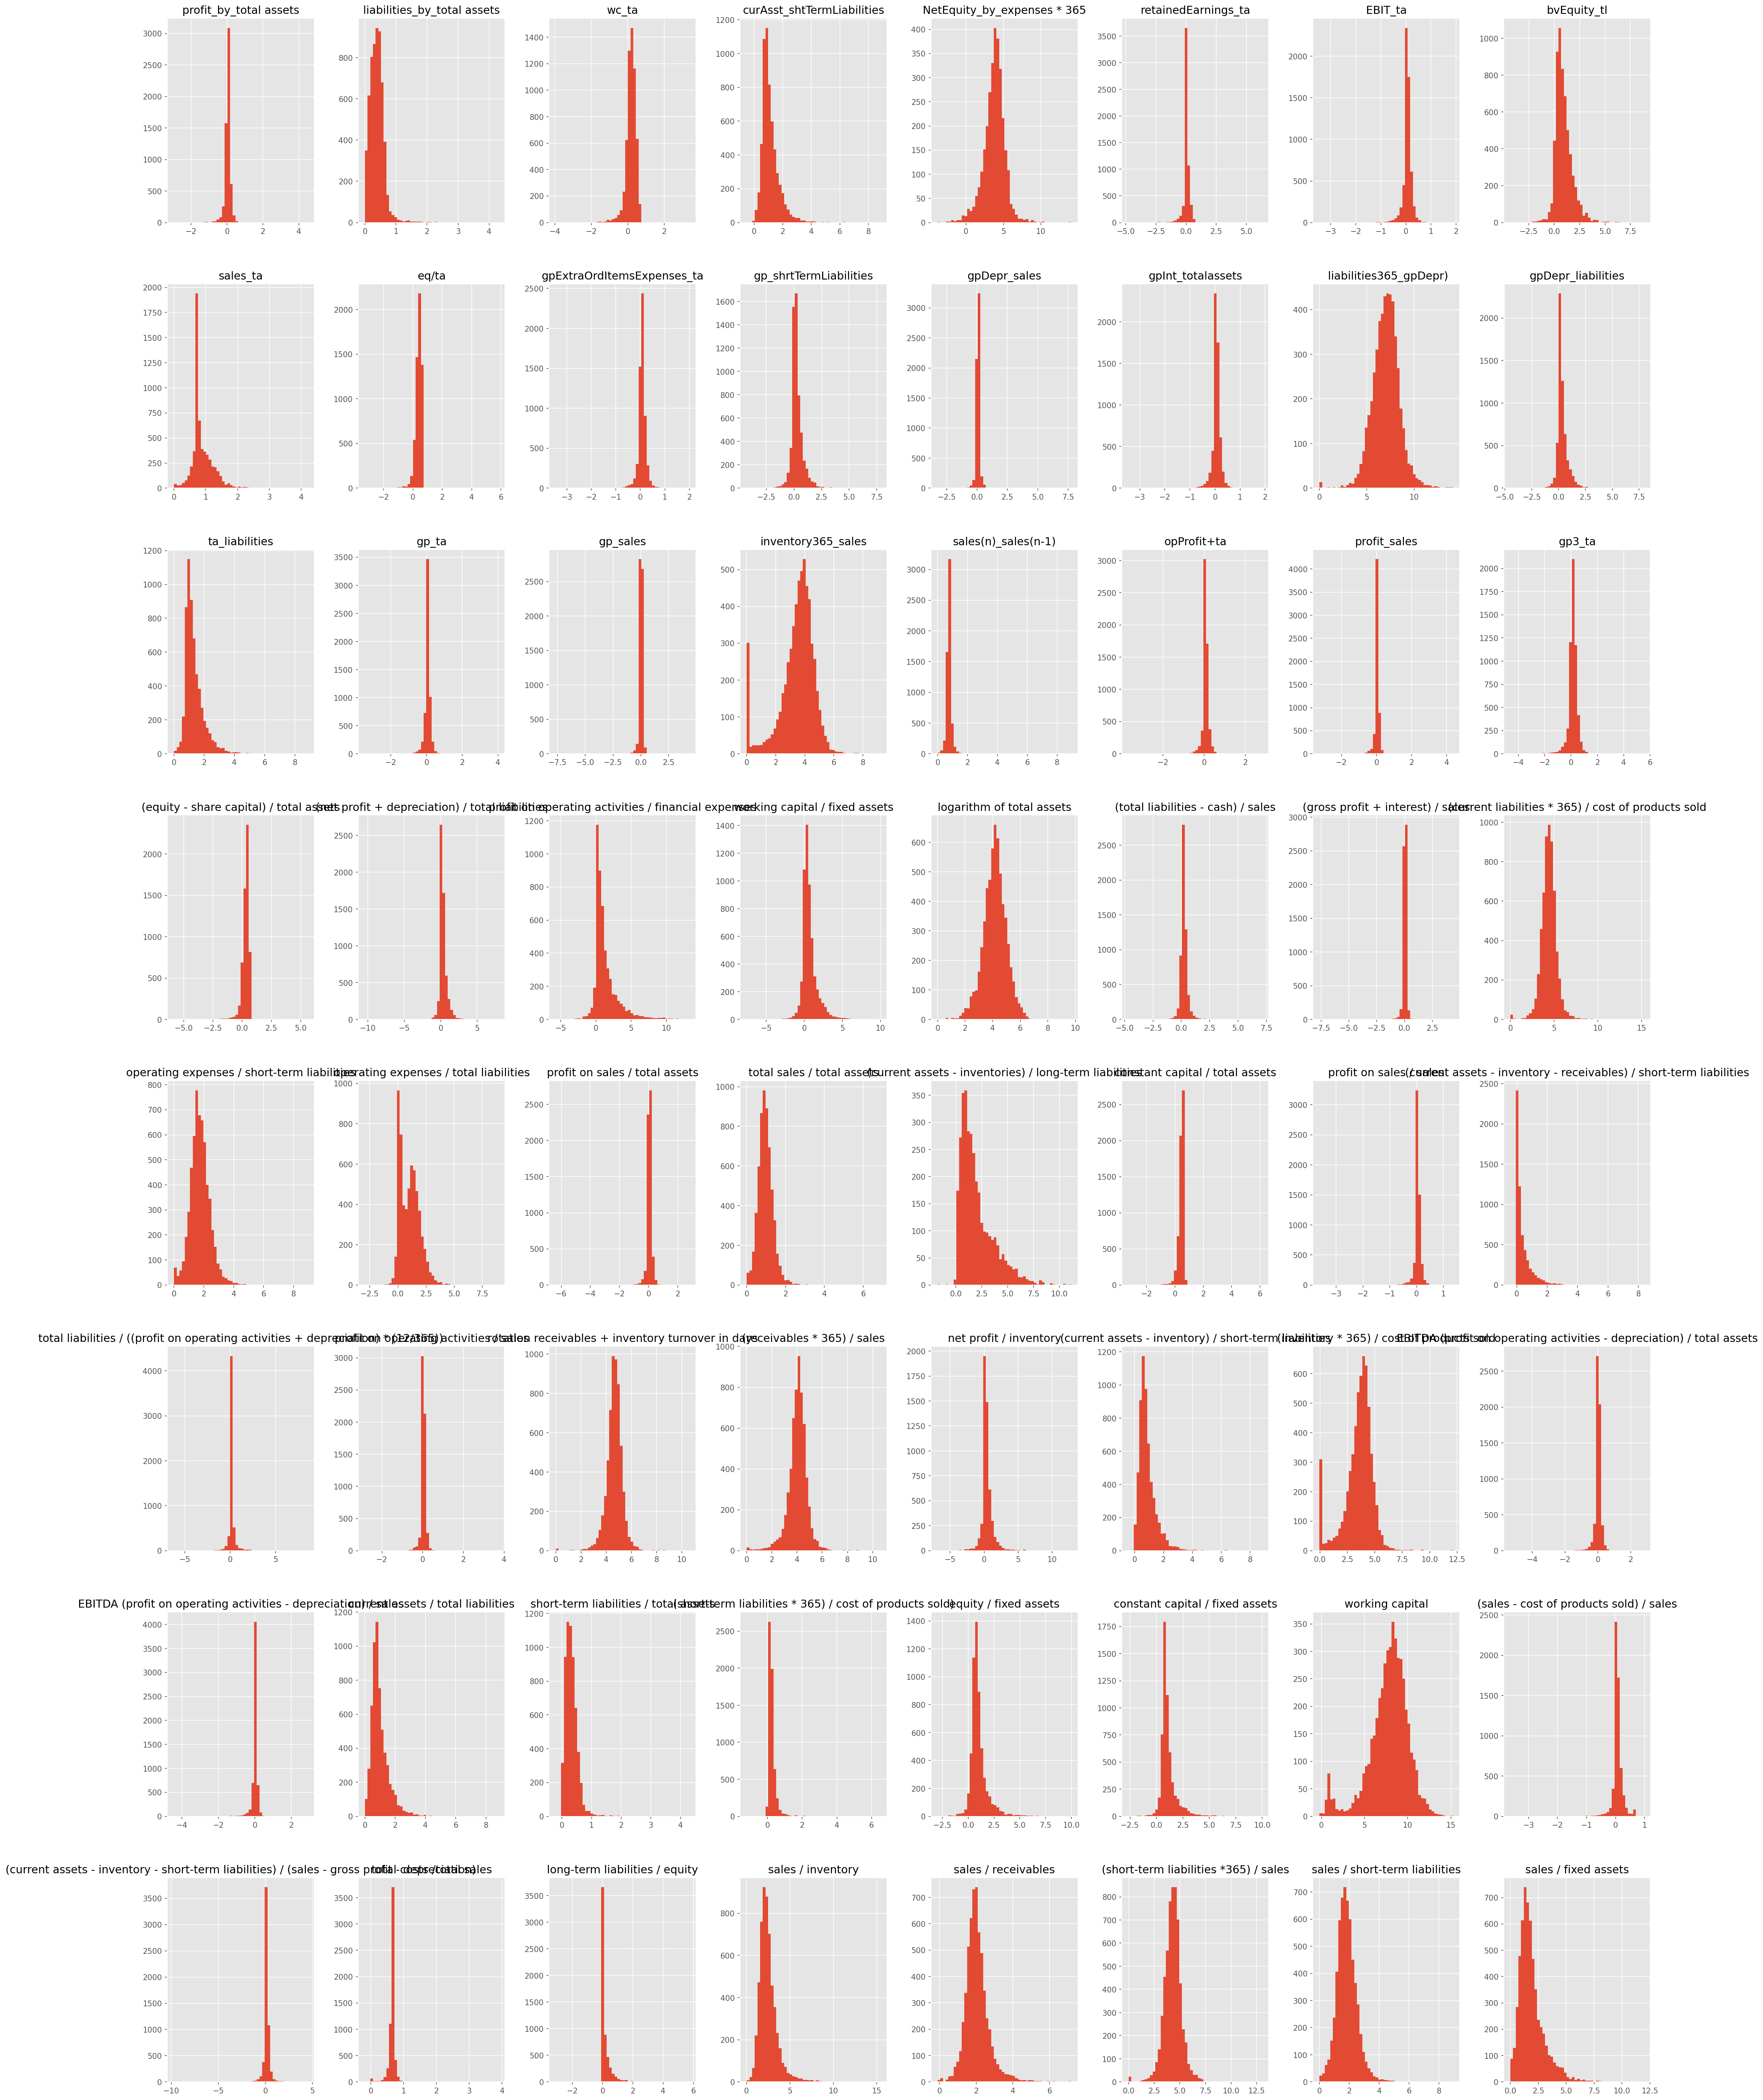

In [17]:
x.hist(figsize=(35,50), bins=50)
plt.show()

In [18]:
x.isnull().sum()

profit_by_total assets                     28
liabilities_by_total assets                 4
wc_ta                                      75
curAsst_shtTermLiabilities                 21
NetEquity_by_expenses * 365              2890
                                         ... 
sales / inventory                         269
sales / receivables                        15
(short-term liabilities *365) / sales       1
sales / short-term liabilities             22
sales / fixed assets                      108
Length: 64, dtype: int64

# Train Test Split

### Split the data into train and test

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
print("xtrain : {}, ytrain : {}, xtest : {}, ytest : {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

xtrain : (4137, 64), ytrain : (4137,), xtest : (1773, 64), ytest : (1773,)


# Processing the x variables

### Fill na

In [21]:
imputer = SimpleImputer()
imputer.fit(x_train)

SimpleImputer()

In [22]:
imputer.transform(x_train)

array([[ 0.21788977,  0.10297166,  0.50679351, ...,  3.62073444,
         2.40125326,  1.54481405],
       [ 0.02760155,  0.30607194,  0.44551881, ...,  4.50495198,
         1.62527189,  2.88312333],
       [ 0.07390638,  0.29069004,  0.35040332, ...,  3.86516198,
         2.17633002,  1.90629279],
       ...,
       [ 0.00832029,  0.42202064,  0.08048353, ...,  5.50772704,
         0.91075544,  1.09691084],
       [-0.02435622,  0.3410688 , -0.44666217, ...,  4.84717474,
         1.35792061,  0.80231544],
       [ 0.16126815,  0.22464642,  0.30937262, ...,  3.3139678 ,
         2.69307192,  1.83706739]])

In [23]:
imputer.transform(x_test)

array([[-3.63158623e-03,  1.73255585e-01,  4.60432976e-01, ...,
         3.15435864e+00,  2.84879717e+00,  2.11404826e+00],
       [-1.53069598e-01,  7.47872080e-01, -9.20148162e-01, ...,
         4.66758145e+00,  1.49555227e+00,  1.77106344e+00],
       [-2.33672802e-03,  4.43589066e-01,  1.00180121e-01, ...,
         4.17155249e+00,  1.90501375e+00,  1.50341051e+00],
       ...,
       [-1.98926662e-01,  5.19484031e-01, -3.03703059e-01, ...,
         4.08022873e+00,  1.98456752e+00,  1.57347907e+00],
       [ 2.53957799e-02,  4.51782376e-01,  1.59538994e-01, ...,
         5.26553588e+00,  1.06319234e+00,  9.75841837e-01],
       [-2.09474894e-01,  6.60598162e-01, -2.04935332e-01, ...,
         5.08889179e+00,  1.18298407e+00,  1.05973285e+00]])

In [24]:
x_train = pd.DataFrame(imputer.transform(x_train), columns = x_train.columns)

In [25]:
x_test = pd.DataFrame(imputer.transform(x_test), columns = x_test.columns)

## Scaling the indicators

In [26]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [27]:
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)

In [28]:
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

# Model Building

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
train_preds = model.predict(x_train)

In [31]:
test_preds = model.predict(x_test)

## Confusion Matrix

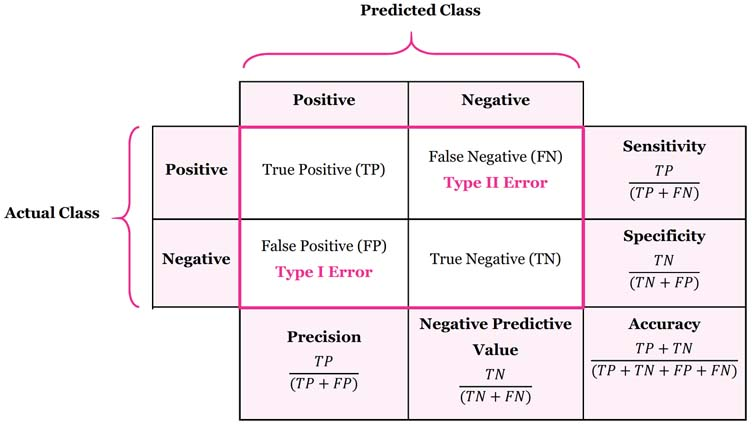> 



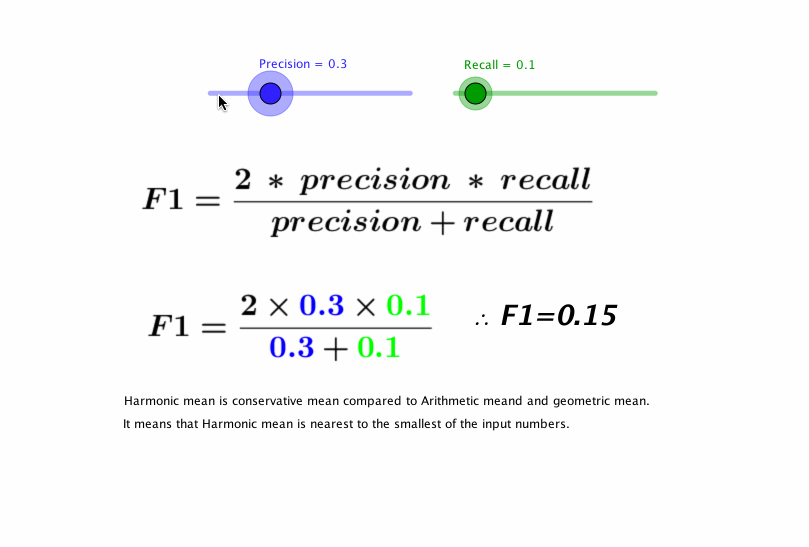

In [32]:
def get_metrics(actual, preds):
  tp, fn, fp, tn = confusion_matrix(actual, preds).reshape(-1)
  precision = tp / (tp+fp)
  recall = tp/ (tp+fn)
  f1 = (2 * tp)/(2*tp +fp+fn)
  accuracy = (tp+tn)/(tp+fp+tn+fn)

  metrics_df = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'accuracy': accuracy
  }, index=['metrics'])
  return metrics_df

In [33]:
metrics = get_metrics(y_train, train_preds)
print(metrics)

         precision   recall  f1_score  accuracy
metrics   0.951678  0.99036  0.970633  0.944404


In [34]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1662
           1       0.49      0.23      0.32       111

    accuracy                           0.94      1773
   macro avg       0.72      0.61      0.64      1773
weighted avg       0.92      0.94      0.93      1773

